<a href="https://colab.research.google.com/github/FleaBusyBeeBergs/FleaBusyBeeBergs/blob/main/nlp_disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Disaster Tweets - RNN model

In [1]:
# general utilities
import os
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



!pip install -q keras-core --upgrade
!pip install -q keras-nlp --upgrade

os.environ['KERAS_BACKEND'] = 'tensorflow'


import tensorflow as tf
import keras_core as keras
import keras_nlp

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

print("TensorFlow version:", tf.__version__)
print("KerasNLP version:", keras_nlp.__version__)

Using TensorFlow backend
TensorFlow version: 2.18.0
KerasNLP version: 0.18.1


In [15]:
import re
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# get set up with kaggle
files.upload()
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# note to self: '_kaggle' file is in dtsa5511 folder

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle competitions download -c nlp-getting-started -p /content/data > /dev/null
!unzip /content/data/nlp-getting-started -d ./data > /dev/null

replace ./data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


target
0    0.57034
1    0.42966
Name: count, dtype: float64 



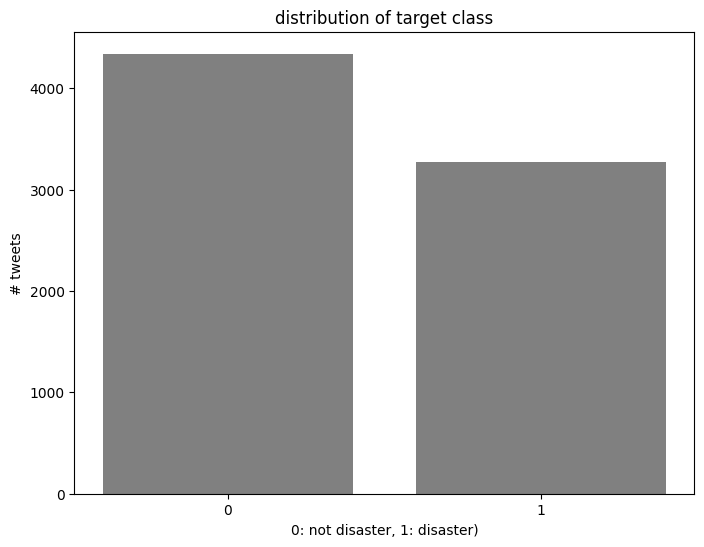

In [23]:
category_counts = df_train['target'].value_counts()
category_prop = category_counts / category_counts.sum()
print(category_prop, '\n')

# vis distribution
plt.figure(figsize = (8, 6))
plt.bar(category_counts.index,
        category_counts.values,
        color = 'gray')
plt.xticks([0, 1])
plt.title('distribution of target class')
plt.xlabel('0: not disaster, 1: disaster)')
plt.ylabel('# tweets')
plt.show()

In [28]:
# function to remove non-alphabetical characters
def remove_non_alpha(text):

   return re.sub(r'[^a-zA-Z\s]', '', re.sub(r'#', '', text))

In [25]:
# function to convert all to lower case
def to_lower(text):
  return text.lower()

In [30]:
# cleaning

data = [X, X_val, X_test]

for i in data:
  i = i.apply(remove_non_alpha)
  i = i.apply(to_lower)

In [16]:
text = df_train['text']

# specify vectorizer
vectorizer = (TfidfVectorizer(max_features = 5000,
                              stop_words='english'))
# vectorize text col
train_tfidf = vectorizer.fit_transform(text)
# feature names
feature_names = vectorizer.get_feature_names_out()

In [31]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
X = df_train['text']
y = df_train['target']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 5011)
X_test = df_test['text']